In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.198222,0.649234,-2.001320,2.056336,0.134284,1
1,-0.128367,-0.894621,1.902476,1.755157,2.223644,0
2,2.557863,-0.077788,0.915390,1.390997,-0.690715,1
3,2.225931,-2.658316,0.037514,-0.835407,-2.429767,1
4,-2.081692,-2.837624,4.868365,4.536383,2.229723,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col3', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [11]:
df3

,col2,col3,target
16,-0.238261,-2.343142,1
19,1.593946,-3.787936,1
87,-3.508694,1.652548,1
83,0.409925,-0.371310,0
28,-0.657719,3.224730,0
24,1.228024,-3.309165,1
92,-0.571650,-0.494880,1
41,-1.022632,2.814856,0
96,-2.684690,1.580454,0
37,-0.280367,-1.504329,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.6617647058823529, 0.9375, 'x[1] <= 1.061\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.4411764705882353, 0.8125, 'x[0] <= 0.437\ngini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(0.5514705882352942, 0.875, 'True  '),
 Text(0.29411764705882354, 0.6875, 'x[1] <= 0.752\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.23529411764705882, 0.5625, 'x[1] <= -0.46\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.11764705882352941, 0.4375, 'x[0] <= -0.149\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.35294117647058826, 0.4375, 'x[1] <= -0.414\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.29411764705882354, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4117647058823529, 0.3125, 'x[1] <= 0.211\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.35294117647058826, 0.1875, 'x

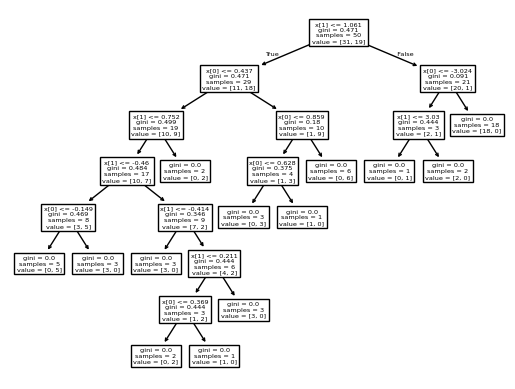

In [15]:
plot_tree(clf1)

[Text(0.5357142857142857, 0.9444444444444444, 'x[0] <= 1.778\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.4642857142857143, 0.8333333333333334, 'x[0] <= -0.575\ngini = 0.408\nsamples = 42\nvalue = [12, 30]'),
 Text(0.5, 0.8888888888888888, 'True  '),
 Text(0.2857142857142857, 0.7222222222222222, 'x[1] <= 1.548\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.21428571428571427, 0.6111111111111112, 'x[1] <= 1.179\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= -1.742\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.07142857142857142, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.3888888888888889, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.6111111111111112, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6428571428571429, 0.7222222222222222, 'x[0] <= 0.217\ngini = 0.491\ns

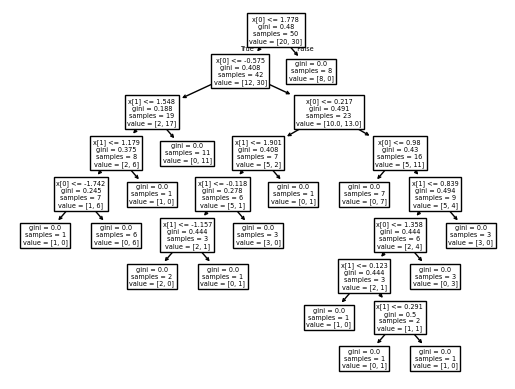

In [16]:
plot_tree(clf2)

[Text(0.5714285714285714, 0.9285714285714286, 'x[1] <= -0.395\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.35714285714285715, 0.7857142857142857, 'x[0] <= -1.165\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(0.4642857142857143, 0.8571428571428572, 'True  '),
 Text(0.14285714285714285, 0.6428571428571429, 'x[1] <= -1.742\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.5, 'x[1] <= -0.95\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.14285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.35714285714285715, 'x[1] <= -0.824\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.21428571428571427, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.21428571428571427, 'x[0] <= -1.462\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2857142857142857, 0.07142857142857142

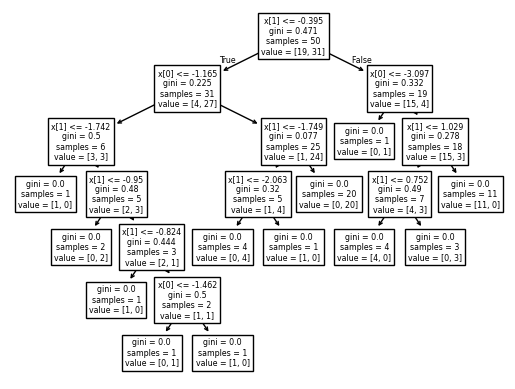

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
19,0.970631,1.593946,-3.787936,1.960557,1.360559,1
32,-1.579841,-1.291030,0.030992,0.752765,1.237443,0
25,0.399297,-1.397449,-1.048402,1.572787,-1.325570,1
21,2.108639,0.558458,-0.863375,0.804927,0.113456,1
93,-1.238617,-0.121379,-1.783660,-0.879554,-0.917002,0
82,-1.559909,-2.125308,1.579425,-0.039603,0.405447,0
48,1.174971,0.243217,-0.291098,2.539992,-0.247803,1
69,-1.966154,-1.148195,0.525516,1.234918,0.432929,0
51,-2.582200,-2.346999,-0.951811,-0.260190,0.597244,0
19,0.970631,1.593946,-3.787936,1.960557,1.360559,1
